# Importing Librairies

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Loading dataset

In [3]:
# Load the data
df = pd.read_csv('../dataset/Global_Education.csv', encoding='latin1')

# data identification and cleaning

In [4]:
df

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
198,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
199,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
200,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

In [6]:
# Renommer toutes les colonnes en lettres minuscules
for col in df.columns:
    df.rename(columns={col : col.lower()}, inplace=True)
    
df.head()

,countries and areas,latitude,longitude,oosr_pre0primary_age_male,oosr_pre0primary_age_female,oosr_primary_age_male,oosr_primary_age_female,oosr_lower_secondary_age_male,oosr_lower_secondary_age_female,oosr_upper_secondary_age_male,...,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,youth_15_24_literacy_rate_female,birth_rate,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [7]:
# Renommer les colonnes de noms de pays
df.rename(columns={'countries and areas' : 'country_name'}, inplace=True)

In [8]:
df.columns

Index(['country_name', 'latitude ', 'longitude', 'oosr_pre0primary_age_male',
       'oosr_pre0primary_age_female', 'oosr_primary_age_male',
       'oosr_primary_age_female', 'oosr_lower_secondary_age_male',
       'oosr_lower_secondary_age_female', 'oosr_upper_secondary_age_male',
       'oosr_upper_secondary_age_female', 'completion_rate_primary_male',
       'completion_rate_primary_female',
       'completion_rate_lower_secondary_male',
       'completion_rate_lower_secondary_female',
       'completion_rate_upper_secondary_male',
       'completion_rate_upper_secondary_female',
       'grade_2_3_proficiency_reading', 'grade_2_3_proficiency_math',
       'primary_end_proficiency_reading', 'primary_end_proficiency_math',
       'lower_secondary_end_proficiency_reading',
       'lower_secondary_end_proficiency_math',
       'youth_15_24_literacy_rate_male', 'youth_15_24_literacy_rate_female',
       'birth_rate', 'gross_primary_education_enrollment',
       'gross_tertiary_education_

In [9]:
# Il y a une ligne avec un nom de pays non identifié, donc on la supprime
print(df['country_name'].unique())
df.loc[[155]]

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'The Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Republic of the Congo' 'Cook Islands' 'Costa Rica' 'Ivory Coast'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea0Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' '

,country_name,latitude,longitude,oosr_pre0primary_age_male,oosr_pre0primary_age_female,oosr_primary_age_male,oosr_primary_age_female,oosr_lower_secondary_age_male,oosr_lower_secondary_age_female,oosr_upper_secondary_age_male,...,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,youth_15_24_literacy_rate_female,birth_rate,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate
155,Sï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿,0.18636,6.613081,49,46,6,6,12,7,19,...,0,0,0,0,98,98,31.54,106.8,13.4,13.37


In [10]:
# Suppression de la ligne 155
df.drop(155, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
# Affichage de toutes les valeurs uniques dans toutes les colonnes
for col in df.columns:
    print(col.upper())
    print(df[col].unique())
    print('-'*50)

COUNTRY_NAME
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'The Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Republic of the Congo' 'Cook Islands' 'Costa Rica' 'Ivory Coast'
 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'North Korea'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'The Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea0Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Icela

In [12]:
# Checking valeurs nulles
df.isna().sum()

country_name                               0
latitude                                   0
longitude                                  0
oosr_pre0primary_age_male                  0
oosr_pre0primary_age_female                0
oosr_primary_age_male                      0
oosr_primary_age_female                    0
oosr_lower_secondary_age_male              0
oosr_lower_secondary_age_female            0
oosr_upper_secondary_age_male              0
oosr_upper_secondary_age_female            0
completion_rate_primary_male               0
completion_rate_primary_female             0
completion_rate_lower_secondary_male       0
completion_rate_lower_secondary_female     0
completion_rate_upper_secondary_male       0
completion_rate_upper_secondary_female     0
grade_2_3_proficiency_reading              0
grade_2_3_proficiency_math                 0
primary_end_proficiency_reading            0
primary_end_proficiency_math               0
lower_secondary_end_proficiency_reading    0
lower_seco

In [13]:
# Après avoir examiné les données, nous avons identifié que l'auteur de l'ensemble de données avait inclus 0 comme espace réservé pour les valeurs nulles.
df.replace(0,np.nan, inplace=True)

In [14]:
df.isna().sum()

country_name                                 0
latitude                                     0
longitude                                    0
oosr_pre0primary_age_male                   52
oosr_pre0primary_age_female                 55
oosr_primary_age_male                       80
oosr_primary_age_female                     85
oosr_lower_secondary_age_male               74
oosr_lower_secondary_age_female             75
oosr_upper_secondary_age_male               51
oosr_upper_secondary_age_female             51
completion_rate_primary_male                95
completion_rate_primary_female              95
completion_rate_lower_secondary_male        95
completion_rate_lower_secondary_female      95
completion_rate_upper_secondary_male        95
completion_rate_upper_secondary_female      95
grade_2_3_proficiency_reading              130
grade_2_3_proficiency_math                 141
primary_end_proficiency_reading            157
primary_end_proficiency_math               152
lower_seconda

In [15]:
# Combinant l'achèvement de l'ensemble de l'enseignement secondaire et l'OOSR dans des colonnes uniques.

df['oosr_secondary_age_male'] = (df['oosr_lower_secondary_age_male'] + df['oosr_upper_secondary_age_male'])/2
df['oosr_secondary_age_female'] = (df['oosr_lower_secondary_age_female'] + df['oosr_upper_secondary_age_female'])/2
df['completion_rate_secondary_male'] = (df['completion_rate_lower_secondary_male'] + df['completion_rate_upper_secondary_male'])/2
df['completion_rate_secondary_female'] = (df['completion_rate_lower_secondary_female'] + df['completion_rate_upper_secondary_female'])/2

In [16]:
# Suppression des colonnes inutiles pour réduire la complexité de l'ensemble de données
df.drop(columns=['oosr_lower_secondary_age_male', 'oosr_upper_secondary_age_male', 'oosr_lower_secondary_age_female', 'oosr_upper_secondary_age_female', 'completion_rate_lower_secondary_male',
                                   'completion_rate_lower_secondary_female', 'completion_rate_upper_secondary_male', 'completion_rate_upper_secondary_female',
                                   'oosr_pre0primary_age_male', 'oosr_pre0primary_age_female','grade_2_3_proficiency_reading','grade_2_3_proficiency_math'], inplace=True)

In [17]:
df.head(2)

,country_name,latitude,longitude,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,...,youth_15_24_literacy_rate_male,youth_15_24_literacy_rate_female,birth_rate,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female
0,Afghanistan,33.939110,67.709953,NaN,NaN,67.0,40.0,13.0,11.0,NaN,...,74.0,56.0,32.49,104.0,9.7,11.12,NaN,NaN,40.5,20.0
1,Albania,41.153332,20.168331,6.0,3.0,94.0,96.0,NaN,NaN,48.0,...,99.0,100.0,11.78,107.0,55.0,12.33,13.5,8.0,87.0,88.5


In [18]:
# resumé statistique
df.describe()

,latitude,longitude,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,youth_15_24_literacy_rate_female,birth_rate,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female
count,201.000000,201.000000,121.000000,116.000000,106.000000,106.000000,44.000000,49.000000,86.000000,91.000000,78.000000,78.000000,188.000000,186.000000,182.000000,175.000000,124.000000,122.000000,106.000000,106.000000
mean,25.205278,55.408490,8.768595,9.646552,78.764151,79.471698,49.204545,42.775510,60.569767,54.274725,91.461538,89.602564,20.154734,102.535484,38.098352,6.849314,21.141129,21.401639,52.636792,53.377358
std,16.762987,45.962398,10.818010,12.195690,20.727967,22.891965,30.863224,26.499422,21.725312,25.403003,13.286740,17.786132,9.937700,13.162930,29.284570,5.069885,17.169476,19.399097,25.550001,28.853226
min,0.023559,0.824782,1.000000,1.000000,29.000000,18.000000,2.000000,1.000000,5.000000,2.000000,48.000000,29.000000,5.900000,23.400000,0.800000,0.090000,1.000000,1.000000,7.000000,2.500000
25%,11.803749,18.732207,2.000000,2.000000,66.250000,64.250000,23.750000,20.000000,48.000000,35.000000,88.250000,90.000000,11.225000,99.075000,12.075000,3.390000,7.875000,6.625000,31.125000,29.500000
50%,21.236736,43.679291,4.000000,4.000000,84.000000,90.500000,45.000000,48.000000,63.000000,57.000000,98.000000,99.000000,17.915000,102.550000,31.250000,5.360000,15.750000,14.250000,50.250000,51.250000
75%,40.069099,77.781167,12.000000,13.000000,96.000000,98.000000,72.750000,67.000000,79.000000,79.000000,99.000000,100.000000,28.667500,108.075000,63.175000,9.295000,31.375000,31.500000,73.375000,79.375000
max,64.963051,178.065032,58.000000,67.000000,100.000000,100.000000,99.000000,89.000000,89.000000,94.000000,100.000000,100.000000,46.080000,142.500000,136.600000,28.180000,72.500000,79.000000,100.000000,100.000000


# Détection des valeurs aberrantes

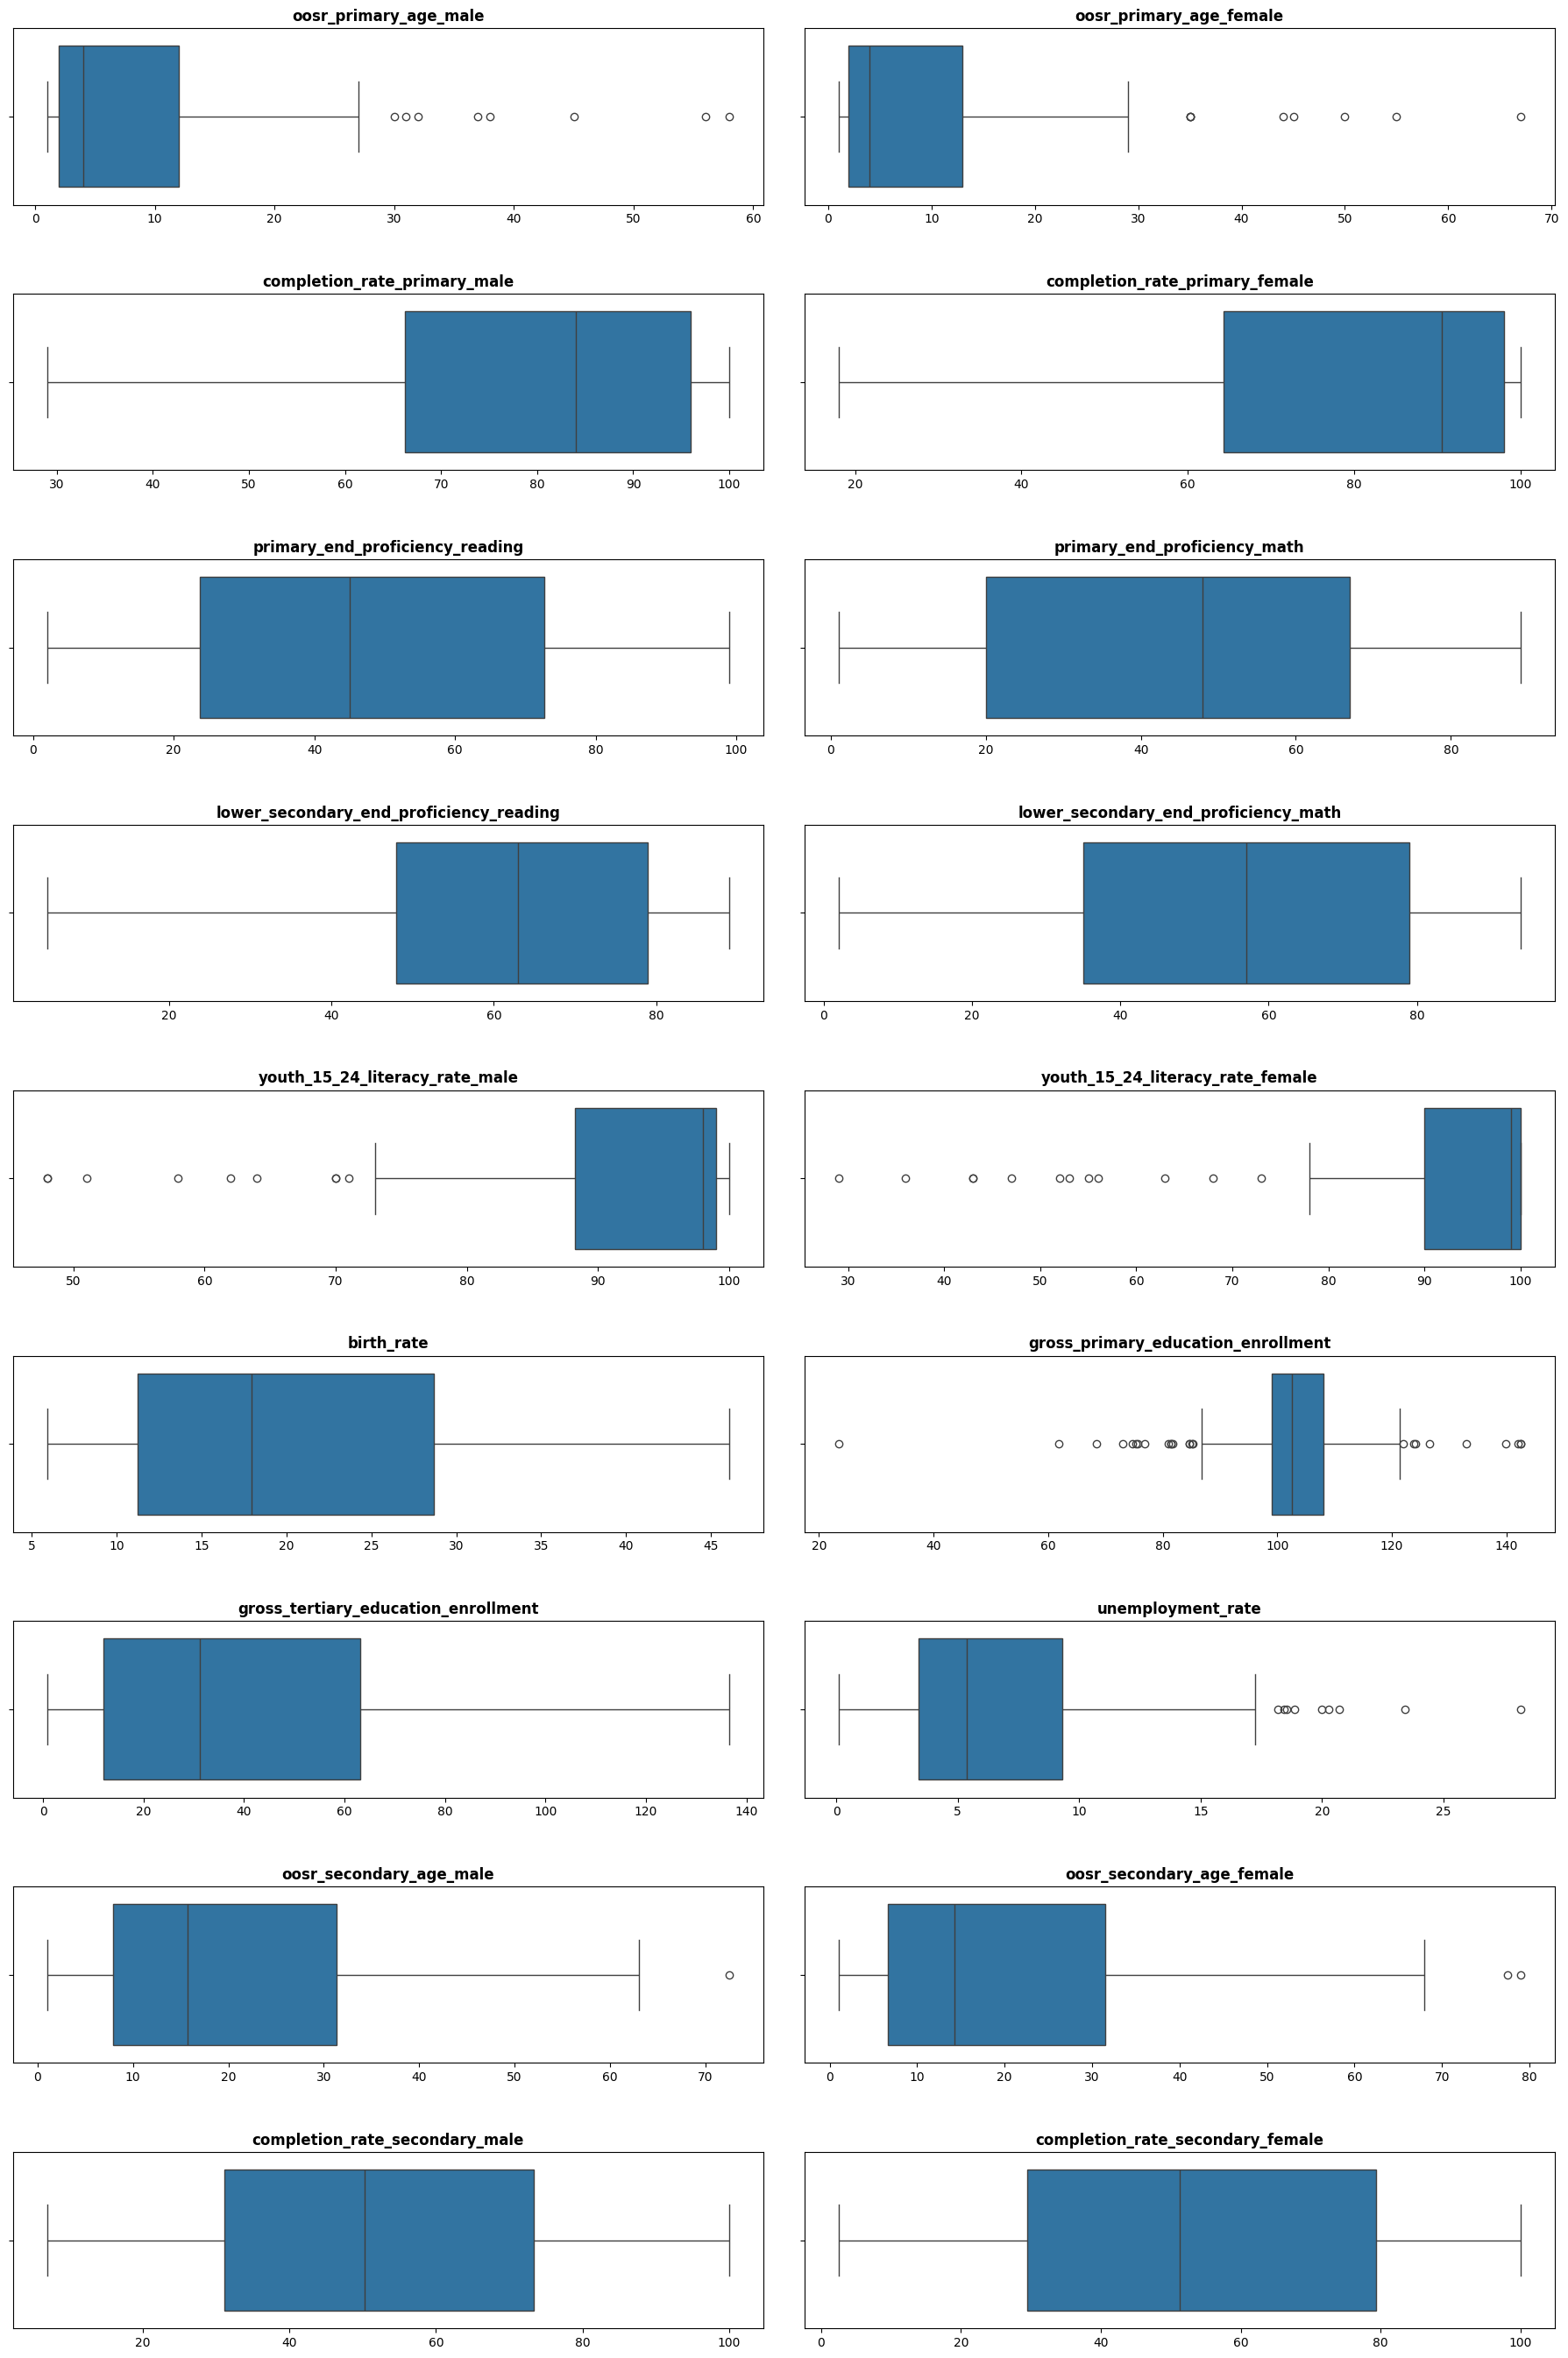

In [19]:
# Creer subplots pour boxplots de toutes les colonnes pour voir la distribution

fig, ax = plt.subplots(9,2, figsize=(18,30))

for i,column in enumerate(df.columns[3:]):
    row = (i//2) % 9
    col = i % 2
   
    sns.boxplot(data=df, x=column, ax=ax[row,col])
    ax[row,col].set_title(column, fontweight='bold')
    ax[row,col].set_xlabel("")

# Setting the padding and sizes of subplots
plt.tight_layout(h_pad=4, w_pad=3, rect=[0,0.05,1,0.95]) 
plt.show()

In [20]:
# Function pour obtenir des valeurs aberrantes

def get_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - (IQR * 1.5)
    upper_limit = Q3 + (IQR * 1.5)
    
    outliers =  df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    
    return outliers[['country_name', column]]

In [21]:
# Printing des valeurs aberrantes de chaque colonne
for column in df.columns[3:]:
    print("Column Name : ", column)
    outliers = get_outliers(df, column)
    outliers = outliers.sort_values(column, ascending=True)
    print(outliers)
    print('-' * 50)


Column Name :  oosr_primary_age_male
          country_name  oosr_primary_age_male
156            Senegal                   30.0
170              Sudan                   31.0
51            Djibouti                   32.0
129              Niger                   37.0
109               Mali                   38.0
58             Eritrea                   45.0
57   Equatorial Guinea                   56.0
166        South Sudan                   58.0
--------------------------------------------------
Column Name :  oosr_primary_age_female
          country_name  oosr_primary_age_female
35                Chad                     35.0
51            Djibouti                     35.0
170              Sudan                     35.0
109               Mali                     44.0
129              Niger                     45.0
58             Eritrea                     50.0
57   Equatorial Guinea                     55.0
166        South Sudan                     67.0
---------------------------

## Les valeurs de latitude et de longitude n'incluent pas de valeurs négatives, ce qui est essentiel pour une cartographie correcte des régions.

In [22]:
# Scrapping correct geo-location data des pays
import requests
from bs4 import BeautifulSoup

# URL of the website containing the table
url = 'https://developers.google.com/public-data/docs/canonical/countries_csv'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table on the page using its HTML tag (e.g., <table>)
    table = soup.find('table')

    countries = []
    # Extract data from the table
    rows = table.find_all('tr')  # Find all table rows
    for row in rows:
        # Extract data from each cell in the row
        cells = row.find_all(['td', 'th'])
        row_data = [cell.text.strip() for cell in cells]
        countries.append(row_data)

else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    
print(countries)

[['country', 'latitude', 'longitude', 'name'], ['AD', '42.546245', '1.601554', 'Andorra'], ['AE', '23.424076', '53.847818', 'United Arab Emirates'], ['AF', '33.93911', '67.709953', 'Afghanistan'], ['AG', '17.060816', '-61.796428', 'Antigua and Barbuda'], ['AI', '18.220554', '-63.068615', 'Anguilla'], ['AL', '41.153332', '20.168331', 'Albania'], ['AM', '40.069099', '45.038189', 'Armenia'], ['AN', '12.226079', '-69.060087', 'Netherlands Antilles'], ['AO', '-11.202692', '17.873887', 'Angola'], ['AQ', '-75.250973', '-0.071389', 'Antarctica'], ['AR', '-38.416097', '-63.616672', 'Argentina'], ['AS', '-14.270972', '-170.132217', 'American Samoa'], ['AT', '47.516231', '14.550072', 'Austria'], ['AU', '-25.274398', '133.775136', 'Australia'], ['AW', '12.52111', '-69.968338', 'Aruba'], ['AZ', '40.143105', '47.576927', 'Azerbaijan'], ['BA', '43.915886', '17.679076', 'Bosnia and Herzegovina'], ['BB', '13.193887', '-59.543198', 'Barbados'], ['BD', '23.684994', '90.356331', 'Bangladesh'], ['BE', '50.

In [23]:
# Converting 2-d array 'countries' into a dataframe
countries_data = pd.DataFrame(countries)

# Setting header rows
countries_data.columns = countries_data.loc[0]

# Dropping the header data
countries_data.drop(0, inplace=True)

countries_data.head()

,country,latitude,longitude,name
1,AD,42.546245,1.601554,Andorra
2,AE,23.424076,53.847818,United Arab Emirates
3,AF,33.93911,67.709953,Afghanistan
4,AG,17.060816,-61.796428,Antigua and Barbuda
5,AI,18.220554,-63.068615,Anguilla


In [24]:
countries_data.rename(columns={'name': 'country_name'}, inplace=True)
countries_data.sort_values('country_name', ascending=True, inplace=True)
countries_data

,country,latitude,longitude,country_name
3,AF,33.93911,67.709953,Afghanistan
6,AL,41.153332,20.168331,Albania
59,DZ,28.033886,1.659626,Algeria
12,AS,-14.270972,-170.132217,American Samoa
1,AD,42.546245,1.601554,Andorra
...,...,...,...,...
238,WF,-13.768752,-177.156097,Wallis and Futuna
63,EH,24.215527,-12.885834,Western Sahara
241,YE,15.552727,48.516388,Yemen
244,ZM,-13.133897,27.849332,Zambia


In [32]:
# print column names of df
print(df.columns)
df.drop(['latitude ', 'longitude'], axis=1, inplace=True)

Index(['country_name', 'latitude ', 'longitude', 'oosr_primary_age_male',
       'oosr_primary_age_female', 'completion_rate_primary_male',
       'completion_rate_primary_female', 'primary_end_proficiency_reading',
       'primary_end_proficiency_math',
       'lower_secondary_end_proficiency_reading',
       'lower_secondary_end_proficiency_math',
       'youth_15_24_literacy_rate_male', 'youth_15_24_literacy_rate_female',
       'birth_rate', 'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'unemployment_rate',
       'oosr_secondary_age_male', 'oosr_secondary_age_female',
       'completion_rate_secondary_male', 'completion_rate_secondary_female'],
      dtype='object')


In [ ]:
df

,country_name,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,youth_15_24_literacy_rate_female,birth_rate,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female
0,Afghanistan,NaN,NaN,67.0,40.0,13.0,11.0,NaN,NaN,74.0,56.0,32.49,104.0,9.7,11.12,NaN,NaN,40.5,20.0
1,Albania,6.0,3.0,94.0,96.0,NaN,NaN,48.0,58.0,99.0,100.0,11.78,107.0,55.0,12.33,13.5,8.0,87.0,88.5
2,Algeria,NaN,NaN,93.0,93.0,NaN,NaN,21.0,19.0,98.0,97.0,24.28,109.9,51.4,11.70,NaN,NaN,35.5,51.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.20,106.4,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,63.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN,40.73,113.5,9.3,6.89,NaN,NaN,33.0,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.88,97.2,79.3,8.80,21.5,16.0,NaN,NaN
197,Vietnam,NaN,NaN,96.0,97.0,55.0,51.0,86.0,81.0,98.0,98.0,16.75,110.6,28.5,2.01,NaN,NaN,65.5,74.0
198,Yemen,10.0,21.0,70.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,30.45,93.6,10.2,12.91,34.5,51.0,46.0,31.0
199,Zambia,17.0,13.0,71.0,73.0,NaN,NaN,5.0,2.0,93.0,92.0,36.19,98.7,4.1,11.43,NaN,NaN,43.5,38.5


In [33]:
df = df.merge(countries_data, how='left', on='country_name')
df

,country_name,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,...,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female,country,latitude,longitude
0,Afghanistan,NaN,NaN,67.0,40.0,13.0,11.0,NaN,NaN,74.0,...,104.0,9.7,11.12,NaN,NaN,40.5,20.0,AF,33.93911,67.709953
1,Albania,6.0,3.0,94.0,96.0,NaN,NaN,48.0,58.0,99.0,...,107.0,55.0,12.33,13.5,8.0,87.0,88.5,AL,41.153332,20.168331
2,Algeria,NaN,NaN,93.0,93.0,NaN,NaN,21.0,19.0,98.0,...,109.9,51.4,11.70,NaN,NaN,35.5,51.0,DZ,28.033886,1.659626
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,106.4,NaN,NaN,NaN,NaN,NaN,NaN,AD,42.546245,1.601554
4,Angola,NaN,NaN,63.0,57.0,NaN,NaN,NaN,NaN,NaN,...,113.5,9.3,6.89,NaN,NaN,33.0,23.5,AO,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.2,79.3,8.80,21.5,16.0,NaN,NaN,VE,6.42375,-66.58973
197,Vietnam,NaN,NaN,96.0,97.0,55.0,51.0,86.0,81.0,98.0,...,110.6,28.5,2.01,NaN,NaN,65.5,74.0,VN,14.058324,108.277199
198,Yemen,10.0,21.0,70.0,55.0,NaN,NaN,NaN,NaN,NaN,...,93.6,10.2,12.91,34.5,51.0,46.0,31.0,YE,15.552727,48.516388
199,Zambia,17.0,13.0,71.0,73.0,NaN,NaN,5.0,2.0,93.0,...,98.7,4.1,11.43,NaN,NaN,43.5,38.5,ZM,-13.133897,27.849332


In [34]:
null_geo_loc = df[df['latitude'].isna()]
null_geo_loc

,country_name,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,...,gross_primary_education_enrollment,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female,country,latitude,longitude
12,The Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81.4,15.1,10.36,26.0,22.5,NaN,NaN,NaN,NaN,NaN
40,Republic of the Congo,15.0,16.0,78.0,82.0,17.0,6.0,NaN,NaN,85.0,...,106.6,12.7,9.47,NaN,NaN,42.0,32.0,NaN,NaN,NaN
43,Ivory Coast,2.0,8.0,60.0,53.0,22.0,3.0,NaN,NaN,64.0,...,99.8,9.3,3.32,46.5,56.0,26.5,18.5,NaN,NaN,NaN
49,Democratic Republic of the Congo,NaN,NaN,67.0,66.0,NaN,NaN,NaN,NaN,NaN,...,108.0,6.6,4.24,NaN,NaN,47.0,39.5,NaN,NaN,NaN
60,Eswatini,15.0,17.0,64.0,77.0,NaN,NaN,NaN,NaN,94.0,...,NaN,NaN,NaN,8.5,10.5,39.0,43.5,NaN,NaN,NaN
66,The Gambia,19.0,10.0,64.0,60.0,NaN,NaN,NaN,NaN,NaN,...,98.0,2.7,9.06,NaN,NaN,41.5,38.0,NaN,NaN,NaN
74,Guinea0Bissau,NaN,NaN,29.0,25.0,NaN,NaN,NaN,NaN,NaN,...,118.7,2.6,2.47,NaN,NaN,16.0,12.0,NaN,NaN,NaN
85,Republic of Ireland,NaN,NaN,NaN,NaN,NaN,NaN,88.0,84.0,NaN,...,100.9,77.8,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,Federated States of Micronesia,9.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.2,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,Myanmar,NaN,NaN,82.0,84.0,NaN,NaN,NaN,NaN,NaN,...,112.3,18.8,1.58,34.5,29.0,29.5,32.0,NaN,NaN,NaN


- Il y a certains pays dont les noms ne correspondent pas aux noms des ensembles de données de pays, leurs valeurs lat et long sont donc nulles.

In [36]:
# Renaming columns directly after researching some country names on the web, they have been either changed or in different language and abbreviations
df.loc[df['country_name'] == "Ivory Coast", 'country_name'] = "Côte d'Ivoire"
df.loc[df['country_name'] == "Republic of the Congo", 'country_name'] = "Congo [Republic]"
df.loc[df['country_name'] == "Democratic Republic of the Congo", 'country_name'] = "Congo [DRC]"
df.loc[df['country_name'] == "Eswatini", 'country_name'] = "Swaziland"
df.loc[df['country_name'] == "Guinea0Bissau", 'country_name'] = "Guinea-Bissau"
df.loc[df['country_name'] == "East Timor", 'country_name'] = "Timor-Leste"

# Other country names list
countries_short_name = ['Bahamas', 'Congo', 'Gambia', 'Ireland', 'Micronesia', 'Myanmar', 'Macedonia', 'Sudan', 'Palestinian']

# Iterating in the null geo loc dataframe
for lab,row in null_geo_loc.iterrows():
    
    # Looping in the other names
    for name in countries_short_name:
        
        # if the country name contains the short name then update it's country name acc. to the country dataset
        if row['country_name'].__contains__(name):
            country_row = countries_data[countries_data['country_name'].str.contains(name)]
            df.loc[lab, 'country_name'] = country_row.values[0][3]
    
    # Also updating lat and long values which were null for all records.        
    country_row = countries_data[countries_data['country_name'] == df.loc[lab, 'country_name']]
    df.loc[lab, 'latitude'] = country_row.values[0][1]
    df.loc[lab, 'longitude'] = country_row.values[0][2]
    df.loc[lab, 'country'] = country_row.values[0][0]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             201 non-null    object 
 1   oosr_primary_age_male                    121 non-null    float64
 2   oosr_primary_age_female                  116 non-null    float64
 3   completion_rate_primary_male             106 non-null    float64
 4   completion_rate_primary_female           106 non-null    float64
 5   primary_end_proficiency_reading          44 non-null     float64
 6   primary_end_proficiency_math             49 non-null     float64
 7   lower_secondary_end_proficiency_reading  86 non-null     float64
 8   lower_secondary_end_proficiency_math     91 non-null     float64
 9   youth_15_24_literacy_rate_male           78 non-null     float64
 10  youth_15_24_literacy_rate_female         78 non-nu

- Converting lat et long values en numeric(float)

In [38]:
df['latitude'] = pd.to_numeric(df['latitude'])
df['longitude'] = pd.to_numeric(df['longitude'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             201 non-null    object 
 1   oosr_primary_age_male                    121 non-null    float64
 2   oosr_primary_age_female                  116 non-null    float64
 3   completion_rate_primary_male             106 non-null    float64
 4   completion_rate_primary_female           106 non-null    float64
 5   primary_end_proficiency_reading          44 non-null     float64
 6   primary_end_proficiency_math             49 non-null     float64
 7   lower_secondary_end_proficiency_reading  86 non-null     float64
 8   lower_secondary_end_proficiency_math     91 non-null     float64
 9   youth_15_24_literacy_rate_male           78 non-null     float64
 10  youth_15_24_literacy_rate_female         78 non-nu

In [39]:
region_data = {
    'Region': ['North America', 'Europe', 'Asia', 'Africa', 'South America', 'Oceania'],
    'Latitude_min': [15.0, 35.0, 0, -35, -60.0, -55.0],
    'Latitude_max': [70.0, 70.0, 80, 35, 20.0, 0],
    'Longitude_min': [-170.0, -25.0, 45.0, -20.0, -90.0, 100],
    'Longitude_max': [-25.0, 40.0, 180.0, 46.5, -30.0, 180]
}

for key,val in region_data.items():
    print(key, val)

Region ['North America', 'Europe', 'Asia', 'Africa', 'South America', 'Oceania']
Latitude_min [15.0, 35.0, 0, -35, -60.0, -55.0]
Latitude_max [70.0, 70.0, 80, 35, 20.0, 0]
Longitude_min [-170.0, -25.0, 45.0, -20.0, -90.0, 100]
Longitude_max [-25.0, 40.0, 180.0, 46.5, -30.0, 180]


In [40]:
for lab,row in df.iterrows():
    # print(row['country_name'], lab)
    for i in range(len(region_data['Region'])):
        if (row['latitude'] >= region_data['Latitude_min'][i] and row['latitude'] <= region_data['Latitude_max'][i]) and (row['longitude'] >= region_data['Longitude_min'][i] and row['longitude'] <= region_data['Longitude_max'][i]):
            df.loc[lab, 'region'] = region_data['Region'][i]
            break
        else:
            df.loc[lab, 'region'] = 'Other'
           

In [41]:
df[df['region'] == 'Other']

,country_name,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,...,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female,country,latitude,longitude,region
30,Cape Verde,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.6,12.25,21.5,18.5,NaN,NaN,CV,16.002082,-24.013197,Other
41,Cook Islands,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.0,16.5,NaN,NaN,CK,-21.236736,-159.777671,Other
67,Georgia,2.0,2.0,100.0,100.0,NaN,NaN,36.0,39.0,NaN,...,63.9,14.40,4.0,3.0,88.5,90.5,GE,42.315407,43.356892,Other
93,Kiribati,NaN,NaN,92.0,96.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.0,54.0,KI,-3.370417,-168.734039,Other
105,Madagascar,NaN,NaN,52.0,60.0,4.0,5.0,NaN,NaN,82.0,...,5.4,1.76,47.0,46.5,21.0,21.0,MG,-18.766947,46.869107,Other
113,Mauritius,3.0,1.0,NaN,NaN,88.0,78.0,NaN,NaN,99.0,...,40.6,6.67,15.5,10.5,NaN,NaN,MU,-20.348404,57.552152,Other
131,Niue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NU,-19.054445,-169.867233,Other
153,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,7.6,8.36,NaN,NaN,NaN,NaN,WS,-13.759029,-172.104629,Other
158,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,...,17.1,NaN,NaN,NaN,NaN,NaN,SC,-4.679574,55.491977,Other
179,Tokelau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,TK,-8.967363,-171.855881,Other


# plot premiers graphiques

In [42]:
# Function pour définir le style et la taille du plot
def set_size_style(width, height, style):
    plt.figure(figsize=(width, height))
    sns.set_style(style)

# Function pour personnaliser le plot
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

C:\Users\alexa\AppData\Local\Temp\ipykernel_15356\2269528897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_unemployment_rates, y='country_name', x='unemployment_rate', palette='viridis')


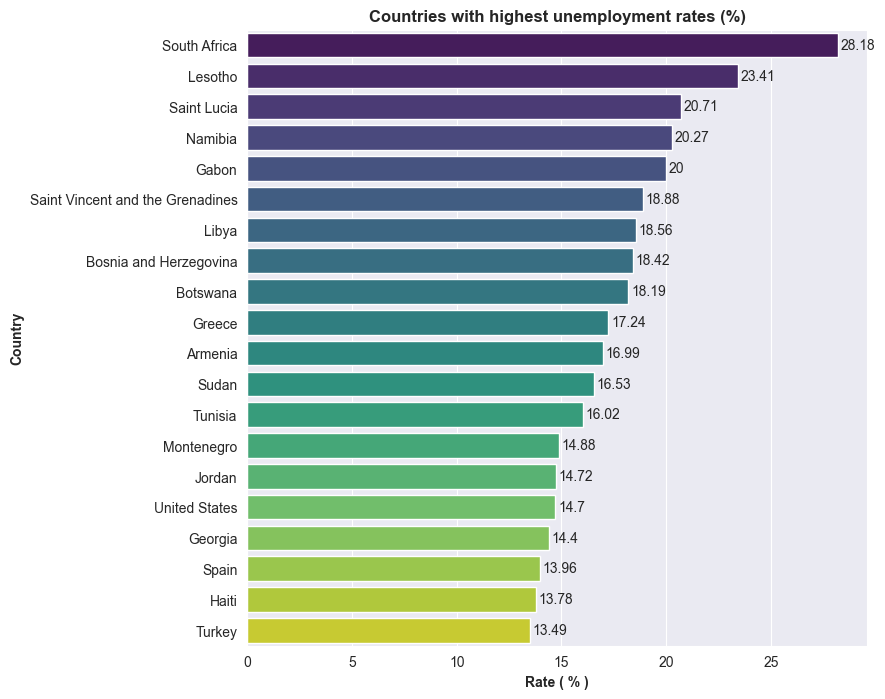

In [43]:
top_unemployment_rates = df.nlargest(20, 'unemployment_rate')

set_size_style(8,8,'darkgrid')
ax = sns.barplot(data=top_unemployment_rates, y='country_name', x='unemployment_rate', palette='viridis')
customize_plot(ax, "Countries with highest unemployment rates (%)", ylabel="Country",  xlabel="Rate ( % )",title_font=12, label_font=10)

for container in ax.containers:
    ax.bar_label(container, padding=2)


plt.show()

C:\Users\alexa\AppData\Local\Temp\ipykernel_15356\1631843852.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_birth_rates, y='country_name', x='birth_rate', palette='viridis')


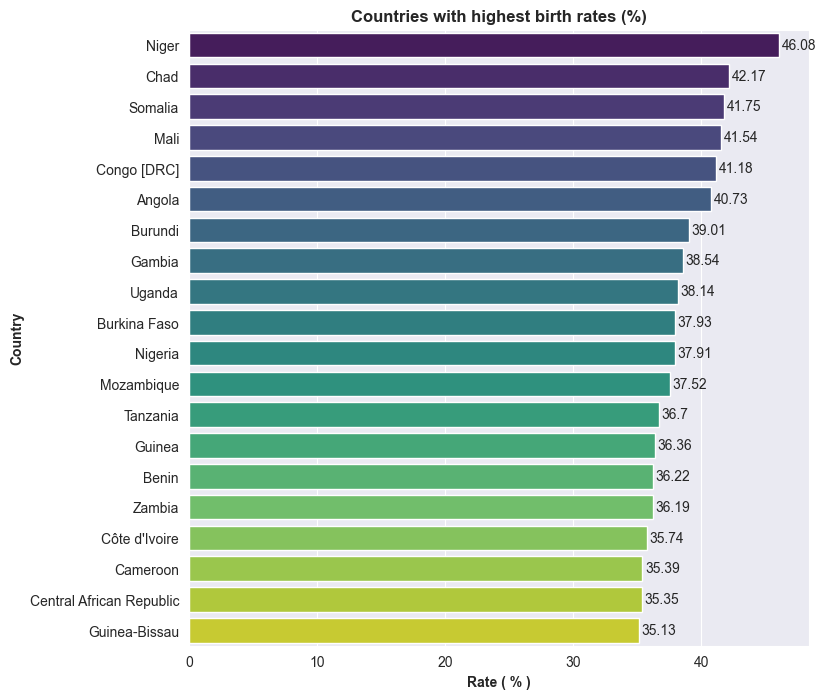

In [44]:
top_birth_rates = df.nlargest(20, 'birth_rate')

set_size_style(8,8,'darkgrid')
ax = sns.barplot(data=top_birth_rates, y='country_name', x='birth_rate', palette='viridis')
customize_plot(ax, "Countries with highest birth rates (%)", ylabel="Country",  xlabel="Rate ( % )",title_font=12, label_font=10)

for container in ax.containers:
    ax.bar_label(container, padding=2)


plt.show()

In [45]:
df.columns

Index(['country_name', 'oosr_primary_age_male', 'oosr_primary_age_female',
       'completion_rate_primary_male', 'completion_rate_primary_female',
       'primary_end_proficiency_reading', 'primary_end_proficiency_math',
       'lower_secondary_end_proficiency_reading',
       'lower_secondary_end_proficiency_math',
       'youth_15_24_literacy_rate_male', 'youth_15_24_literacy_rate_female',
       'birth_rate', 'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'unemployment_rate',
       'oosr_secondary_age_male', 'oosr_secondary_age_female',
       'completion_rate_secondary_male', 'completion_rate_secondary_female',
       'country', 'latitude', 'longitude', 'region'],
      dtype='object')

In [46]:

df.head()

,country_name,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,...,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female,country,latitude,longitude,region
0,Afghanistan,NaN,NaN,67.0,40.0,13.0,11.0,NaN,NaN,74.0,...,9.7,11.12,NaN,NaN,40.5,20.0,AF,33.939110,67.709953,Asia
1,Albania,6.0,3.0,94.0,96.0,NaN,NaN,48.0,58.0,99.0,...,55.0,12.33,13.5,8.0,87.0,88.5,AL,41.153332,20.168331,Europe
2,Algeria,NaN,NaN,93.0,93.0,NaN,NaN,21.0,19.0,98.0,...,51.4,11.70,NaN,NaN,35.5,51.0,DZ,28.033886,1.659626,Africa
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AD,42.546245,1.601554,Europe
4,Angola,NaN,NaN,63.0,57.0,NaN,NaN,NaN,NaN,NaN,...,9.3,6.89,NaN,NaN,33.0,23.5,AO,-11.202692,17.873887,Africa


,unemployment_rate,birth_rate,youth_15_24_literacy_rate_male,youth_15_24_literacy_rate_female,oosr_secondary_age_male,oosr_secondary_age_female
unemployment_rate,1.000000,-0.051900,0.061581,0.087828,-0.146692,-0.172586
birth_rate,-0.051900,1.000000,-0.777551,-0.759499,0.859689,0.869610
youth_15_24_literacy_rate_male,0.061581,-0.777551,1.000000,0.973330,-0.825299,-0.872690
youth_15_24_literacy_rate_female,0.087828,-0.759499,0.973330,1.000000,-0.818876,-0.889620
oosr_secondary_age_male,-0.146692,0.859689,-0.825299,-0.818876,1.000000,0.963161
oosr_secondary_age_female,-0.172586,0.869610,-0.872690,-0.889620,0.963161,1.000000


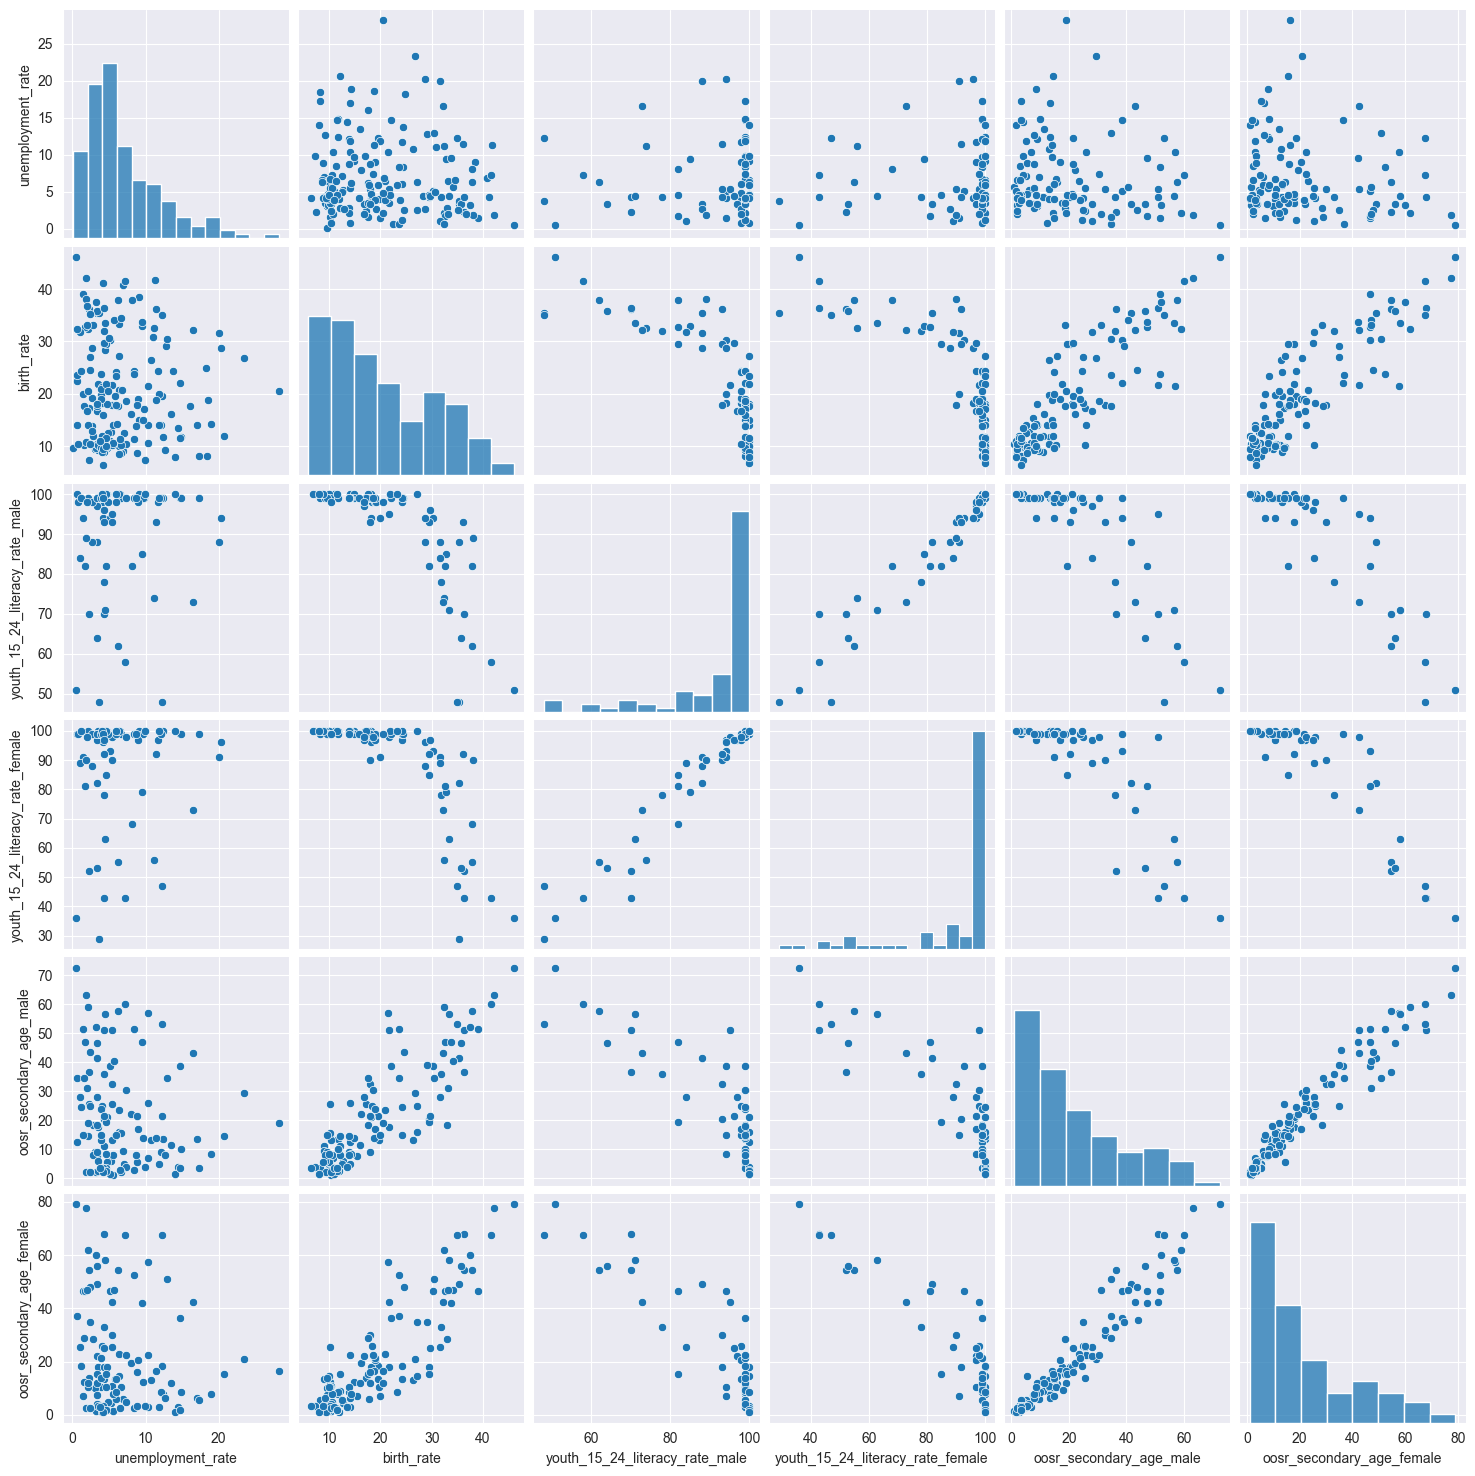

In [47]:
sub_df = df[['unemployment_rate', 'birth_rate', 'youth_15_24_literacy_rate_male', 'youth_15_24_literacy_rate_female',
                               'oosr_secondary_age_male', 'oosr_secondary_age_female']]

sns.pairplot(sub_df)

sub_df.corr()

- Le taux de natalité est très négativement corrélé au taux d’alphabétisation, ce qui signifie que les pays où le taux de natalité est plus élevé ont tendance à avoir moins d’alphabétisation chez les jeunes.

- Le taux de natalité a également une forte corrélation positive avec l'OOSR de l'enseignement secondaire : plus le taux de natalité est élevé, plus les enfants sont non scolarisés.

- L'alphabétisation des jeunes est en forte corrélation négative avec l'OOSR : plus il y a d'alphabétisation dans le pays, plus les élèves ont réussi l'école.

- Dans le nuage de points entre le chômage et l'OOSR, davantage de points sont regroupés dans la région inférieure des deux colonnes, ce qui signifie qu'un OOSR plus faible entraîne un taux de chômage plus faible.

In [48]:
df

,country_name,oosr_primary_age_male,oosr_primary_age_female,completion_rate_primary_male,completion_rate_primary_female,primary_end_proficiency_reading,primary_end_proficiency_math,lower_secondary_end_proficiency_reading,lower_secondary_end_proficiency_math,youth_15_24_literacy_rate_male,...,gross_tertiary_education_enrollment,unemployment_rate,oosr_secondary_age_male,oosr_secondary_age_female,completion_rate_secondary_male,completion_rate_secondary_female,country,latitude,longitude,region
0,Afghanistan,NaN,NaN,67.0,40.0,13.0,11.0,NaN,NaN,74.0,...,9.7,11.12,NaN,NaN,40.5,20.0,AF,33.939110,67.709953,Asia
1,Albania,6.0,3.0,94.0,96.0,NaN,NaN,48.0,58.0,99.0,...,55.0,12.33,13.5,8.0,87.0,88.5,AL,41.153332,20.168331,Europe
2,Algeria,NaN,NaN,93.0,93.0,NaN,NaN,21.0,19.0,98.0,...,51.4,11.70,NaN,NaN,35.5,51.0,DZ,28.033886,1.659626,Africa
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,AD,42.546245,1.601554,Europe
4,Angola,NaN,NaN,63.0,57.0,NaN,NaN,NaN,NaN,NaN,...,9.3,6.89,NaN,NaN,33.0,23.5,AO,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Venezuela,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.3,8.80,21.5,16.0,NaN,NaN,VE,6.423750,-66.589730,South America
197,Vietnam,NaN,NaN,96.0,97.0,55.0,51.0,86.0,81.0,98.0,...,28.5,2.01,NaN,NaN,65.5,74.0,VN,14.058324,108.277199,Asia
198,Yemen,10.0,21.0,70.0,55.0,NaN,NaN,NaN,NaN,NaN,...,10.2,12.91,34.5,51.0,46.0,31.0,YE,15.552727,48.516388,Asia
199,Zambia,17.0,13.0,71.0,73.0,NaN,NaN,5.0,2.0,93.0,...,4.1,11.43,NaN,NaN,43.5,38.5,ZM,-13.133897,27.849332,Africa


In [49]:
world_edu_region = df.groupby('region')[['completion_rate_secondary_female', 'completion_rate_secondary_male']].mean().reset_index()
world_edu_region

,region,completion_rate_secondary_female,completion_rate_secondary_male
0,Africa,32.543478,34.293478
1,Asia,63.863636,63.727273
2,Europe,89.055556,87.833333
3,North America,62.312500,58.125000
4,Oceania,55.250000,54.000000
5,Other,57.875000,51.375000
6,South America,74.266667,68.733333


In [50]:
world_edu_region = world_edu_region.melt(id_vars=['region'] , var_name="gender", value_name="completion_rate")
world_edu_region = world_edu_region.replace({'completion_rate_secondary_female' : 'female', 'completion_rate_secondary_male' : 'male'})

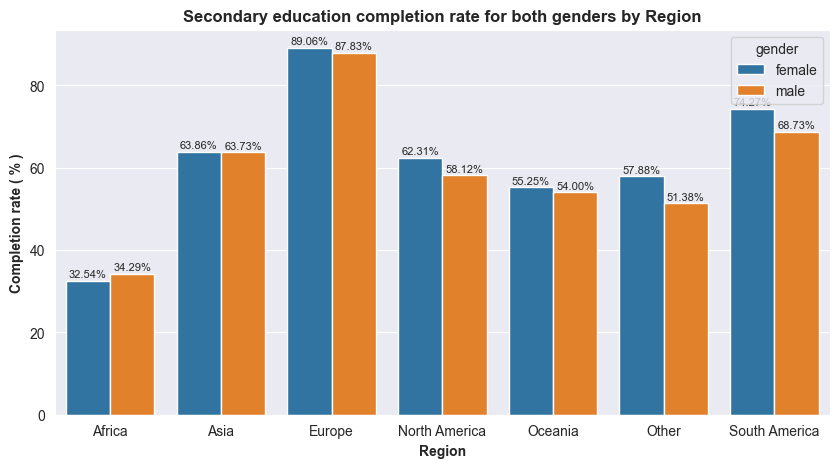

In [51]:
set_size_style(10,5,"darkgrid")
ax = sns.barplot(data=world_edu_region, x='region', y='completion_rate', hue='gender', palette='tab10')
customize_plot(ax, 'Secondary education completion rate for both genders by Region', 'Region', 'Completion rate ( % )',12,10)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', size=8, padding=1)

[[ 0.22665114  0.23778659 -0.26821801 -0.27062962 -0.09969527 -0.10943974
  -0.07093027 -0.06879707 -0.195875   -0.18902942  0.39571115 -0.07362698
  -0.31987073 -0.06177484  0.30756423  0.31102757 -0.25914564 -0.27103397
  -0.20183579  0.01723067]
 [ 0.13521495  0.17042267 -0.16885503 -0.214188    0.07906234  0.07420505
   0.31534642  0.35379777 -0.13983431 -0.14204481 -0.17602603 -0.31535835
   0.28221075 -0.21320828 -0.0213946   0.0249266  -0.08908838 -0.12595992
   0.51904145  0.22881918]
 [ 0.37365661  0.34183593  0.21740634  0.1746659   0.02553271  0.02146889
  -0.1320834  -0.14519336 -0.00730729 -0.00121323  0.00405481 -0.59172584
  -0.00855945  0.33592021  0.0824429   0.06498009  0.25982982  0.2562049
   0.05088782 -0.12738737]
 [-0.01259934 -0.00097994 -0.13175325 -0.13902321 -0.01853948 -0.02506199
   0.1291227   0.09441249 -0.1245536  -0.12650932 -0.07557711  0.06793194
   0.171997    0.2944394  -0.08986878 -0.04977183 -0.14125272 -0.12769469
   0.0614403  -0.85316266]
 [ 0.

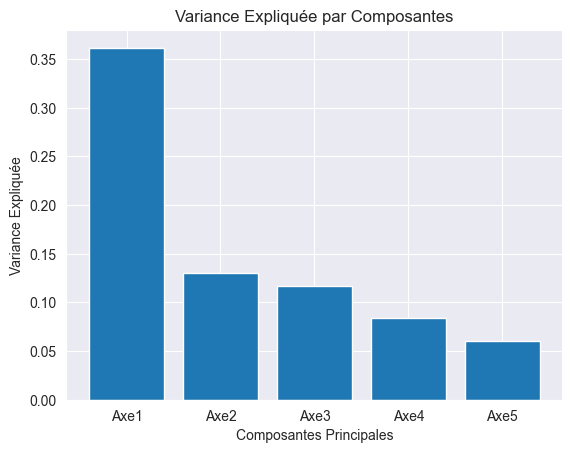

In [56]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_scaled)

# Application de l'ACP
pca = PCA(n_components=5)
pcs = pca.fit_transform(df_imputed)

# Afficher les composantes
print(pca.components_)

# Visualiser la variance expliquée par chaque composante
plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5"], pca.explained_variance_ratio_)
plt.ylabel("Variance Expliquée")
plt.xlabel("Composantes Principales")
plt.title("Variance Expliquée par Composantes")
plt.show()

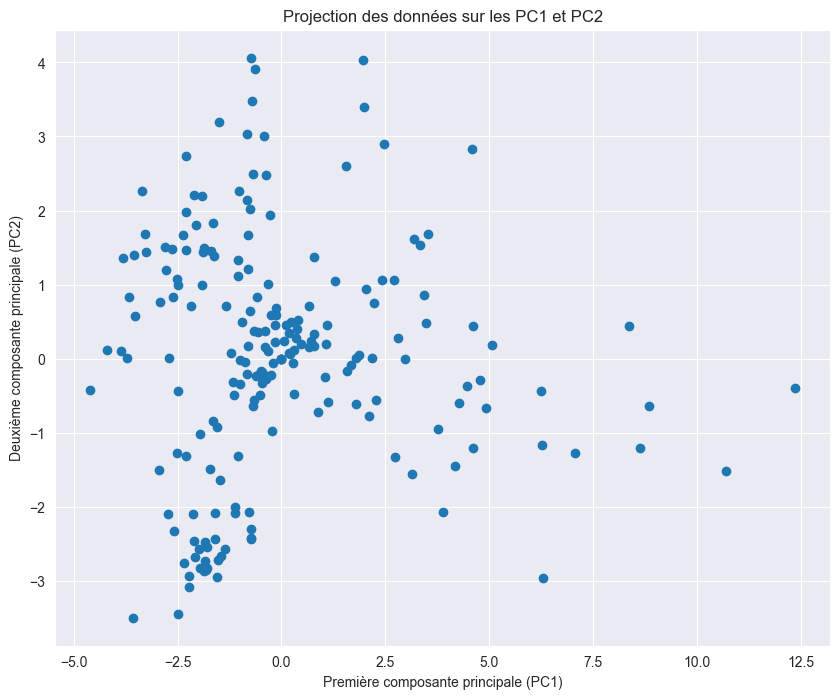

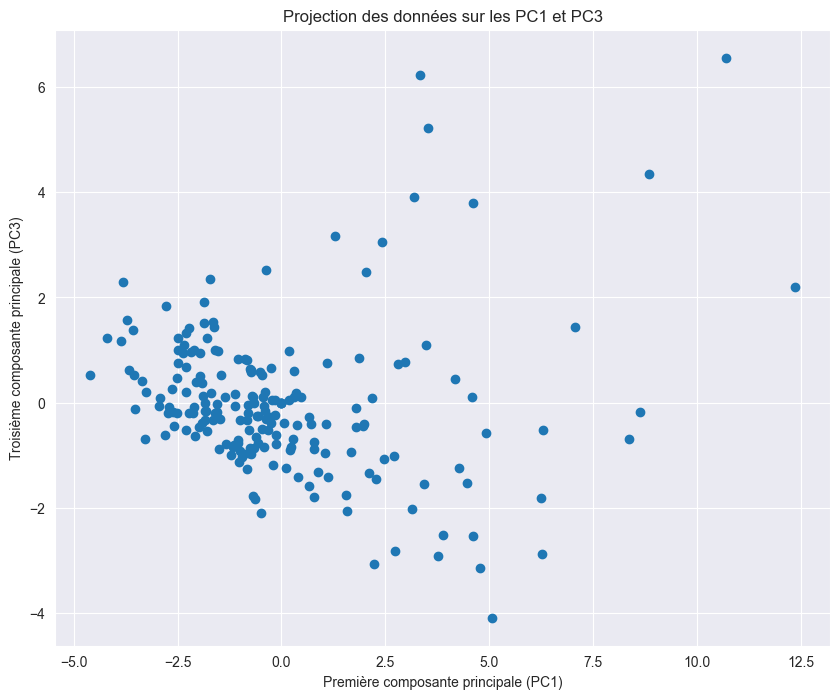

In [74]:
pca = PCA(n_components=3)  # Nous utilisons 3 composantes pour pouvoir visualiser (1,2) et (1,3)
pcs = pca.fit_transform(df_scaled)

# Création d'un DataFrame pour les composantes principales
pcs_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2', 'PC3'])

# Visualisation des données selon les axes (1, 2)
plt.figure(figsize=(10, 8))
plt.scatter(pcs_df['PC1'], pcs_df['PC2'])
plt.title('Projection des données sur les PC1 et PC2')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.grid(True)
plt.show()

# Visualisation des données selon les axes (1, 3)
plt.figure(figsize=(10, 8))
plt.scatter(pcs_df['PC1'], pcs_df['PC3'])
plt.title('Projection des données sur les PC1 et PC3')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Troisième composante principale (PC3)')
plt.grid(True)
plt.show()

[[ 0.23542701  0.25220127 -0.27803453 -0.30028685 -0.09495342 -0.10825434
  -0.05738428 -0.05627691 -0.21477378 -0.20926131  0.38545787 -0.07500292
  -0.30669331 -0.05299724  0.30259159  0.30830538 -0.23846555 -0.25195787
  -0.19501855  0.01767981]
 [ 0.36161965  0.36554304  0.05074065  0.01794218  0.07352183  0.08002166
   0.14099373  0.1621506  -0.07926228 -0.07537273 -0.14064745 -0.60590896
   0.21954636  0.02770785  0.05477325  0.07904033  0.0971669   0.06956775
   0.425905    0.14821984]
 [ 0.19853678  0.15785976  0.23698331  0.2066995  -0.0280204  -0.037033
  -0.31204449 -0.35226784  0.08251777  0.08852711  0.10113777 -0.23740753
  -0.18079909  0.40856329  0.05264563  0.01443275  0.26526478  0.28542352
  -0.31951426 -0.27460112]
 [ 0.01451171  0.00170381  0.12285773  0.13245341  0.0131788   0.03194119
  -0.15472901 -0.12531302  0.12772627  0.13097478  0.09045645 -0.02686311
  -0.19120401 -0.27514249  0.06077955  0.01927805  0.1349776   0.12585466
  -0.14479762  0.8441475 ]
 [-0.0

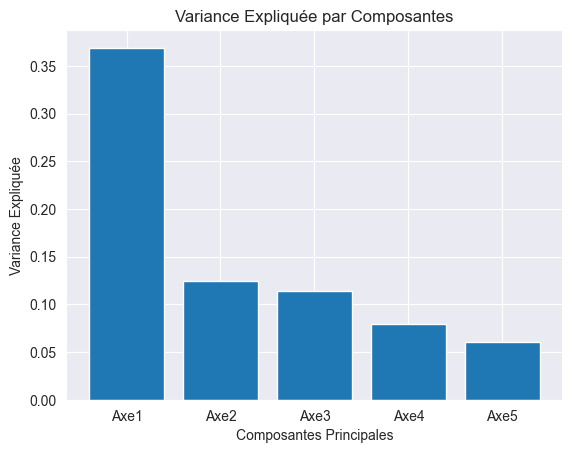

In [58]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df_scaled)

# Application de l'ACP
pca = PCA(n_components=5)
pcs = pca.fit_transform(df_imputed)

# Afficher les composantes
print(pca.components_)

# Visualiser la variance expliquée par chaque composante
plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5"], pca.explained_variance_ratio_)
plt.ylabel("Variance Expliquée")
plt.xlabel("Composantes Principales")
plt.title("Variance Expliquée par Composantes")
plt.show()

[[ 0.24745939  0.26615905 -0.3259434  -0.32308271 -0.08363345 -0.12251756
  -0.13358483  0.05064712 -0.21358699 -0.20698549  0.37033289 -0.07595038
  -0.28937651 -0.03918411  0.32774884  0.33037211 -0.14010362 -0.16696066
  -0.18430322  0.0140521 ]
 [ 0.2146337   0.22814623  0.0907736   0.04015684  0.06240917  0.16920299
   0.3178406   0.24187187 -0.05266811 -0.0511863  -0.19095341 -0.36674132
   0.2575516  -0.19596002  0.08471099  0.10001446 -0.29732055 -0.28368883
   0.43423571  0.21040954]
 [ 0.34016565  0.31995671  0.17092692  0.14328315  0.02273882 -0.02004405
  -0.12622605 -0.24187819  0.01674654  0.02206871 -0.04303207 -0.46107379
   0.05552527  0.31578758  0.12950076  0.10323849  0.39606598  0.37798313
   0.06360068 -0.08709627]
 [ 0.04465731  0.01924102  0.06234073  0.08052911  0.00855769  0.14181437
  -0.15653691 -0.0564155   0.10884972  0.11548233  0.13546185 -0.06111197
  -0.21308675 -0.25586033 -0.07075413 -0.08182114  0.12661458  0.11071561
  -0.13760446  0.84989918]
 [ 0

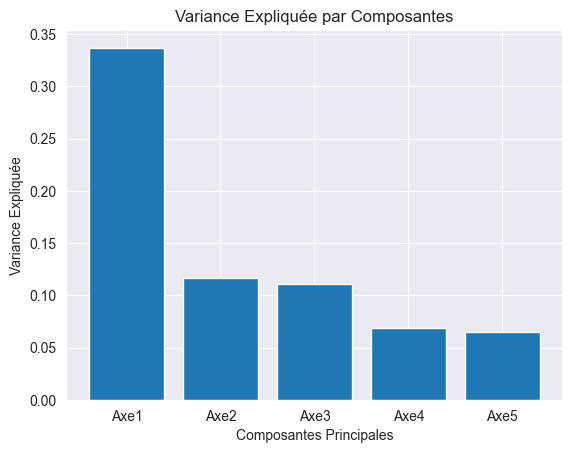

In [59]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Imputer les valeurs manquantes
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = imputer.fit_transform(df_scaled)

# Application de l'ACP
pca = PCA(n_components=5)
pcs = pca.fit_transform(df_imputed)

# Afficher les composantes
print(pca.components_)

# Visualiser la variance expliquée par chaque composante
plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5"], pca.explained_variance_ratio_)
plt.ylabel("Variance Expliquée")
plt.xlabel("Composantes Principales")
plt.title("Variance Expliquée par Composantes")
plt.show()

[[ 2.20493300e-01  2.33847669e-01 -2.11927506e-01 -2.28774671e-01
  -2.33502144e-01 -2.08477310e-01 -2.44877391e-01 -2.39855210e-01
  -2.18835698e-01 -2.10975328e-01  2.54435882e-01 -2.42043038e-01
  -2.37926176e-01 -2.20753533e-01  2.51682512e-01  2.51931032e-01
  -2.17875374e-01 -2.07233789e-01  1.59976774e-01 -1.41706897e-01]
 [ 3.12893504e-01  2.34743699e-01  3.08341915e-01  2.52569960e-01
  -1.59328287e-01 -3.61900653e-01 -1.21420973e-01 -1.54098262e-01
   3.35080678e-01  1.30268534e-01  6.84142995e-02 -1.82708453e-01
   2.00795891e-01 -3.21628130e-01 -1.08970036e-01 -8.09672804e-02
   2.76538272e-01  2.93768867e-01  2.07605590e-03 -3.15639508e-02]
 [ 1.14834913e-01  9.86785839e-02  1.21377020e-01  1.11274034e-01
   2.30687751e-01  1.11194411e-01  1.57281860e-01  1.64778974e-01
  -1.60031961e-03  3.50918403e-01  1.87403447e-02 -6.65748172e-02
   6.93148445e-02 -3.29493270e-02 -4.68850727e-02 -8.08360709e-02
  -1.78990494e-01 -2.30008619e-01  5.27604775e-01 -5.71515109e-01]
 [-8.69

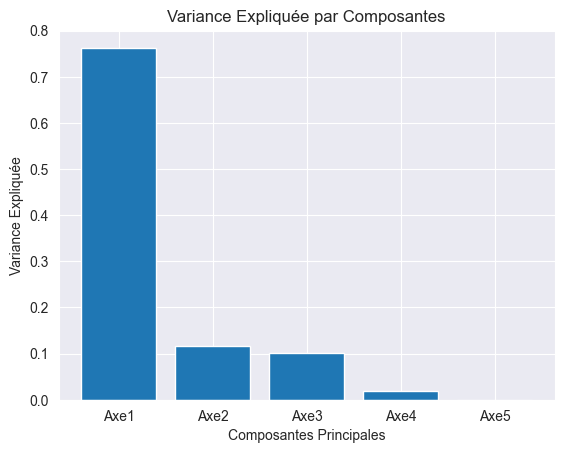

In [60]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Supprimer les lignes contenant des NaN
df_clean = df_numeric.dropna()

# Standardiser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

# Application de l'ACP
pca = PCA(n_components=5)
pcs = pca.fit_transform(df_scaled)

# Afficher les composantes
print(pca.components_)

# Visualiser la variance expliquée par chaque composante
plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5"], pca.explained_variance_ratio_)
plt.ylabel("Variance Expliquée")
plt.xlabel("Composantes Principales")
plt.title("Variance Expliquée par Composantes")
plt.show()

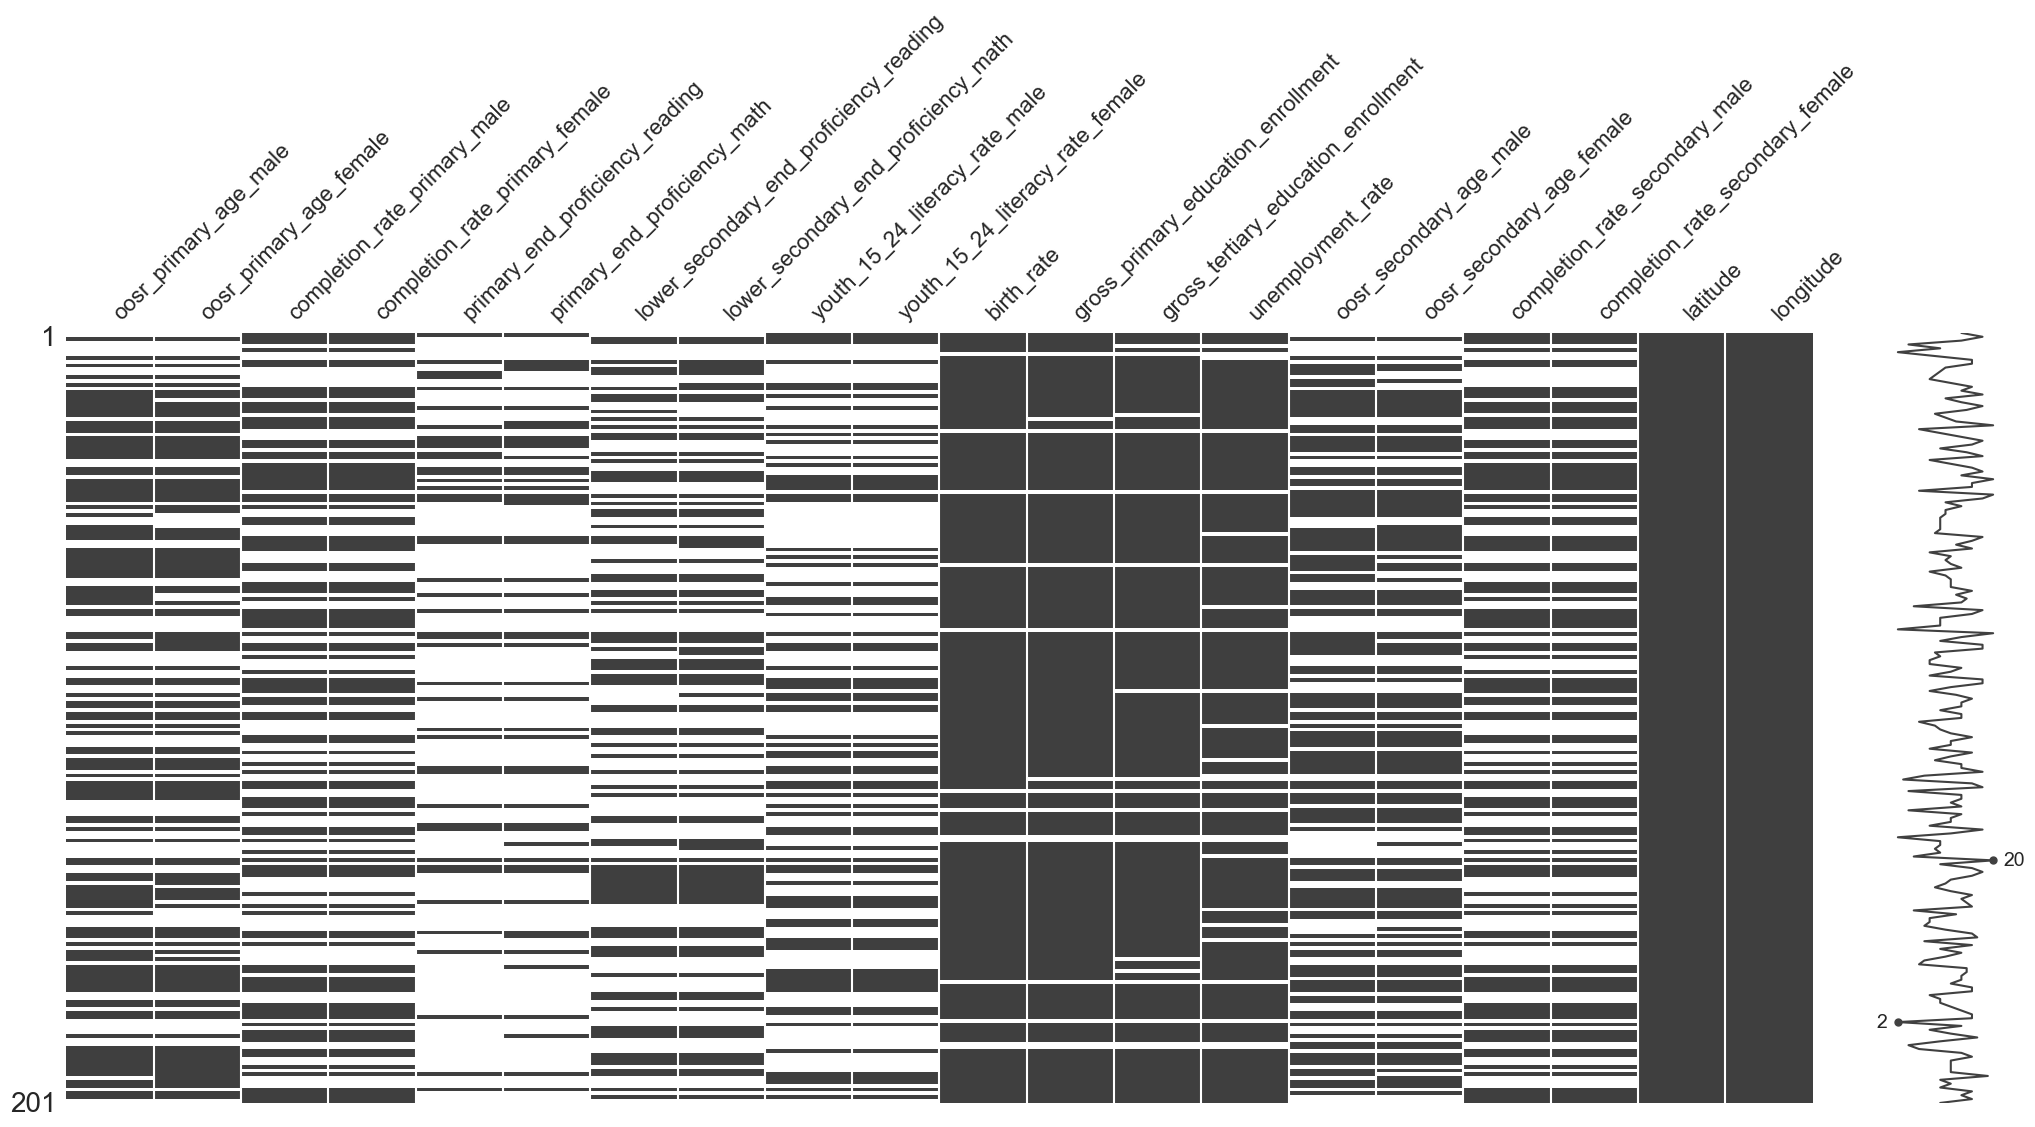

In [62]:
import missingno as msno

# Visualiser les valeurs manquantes
msno.matrix(df_numeric)
plt.show()

In [63]:
# Calcul du nombre total de lignes avant suppression
total_rows = len(df)

# Suppression des lignes contenant des NaN dans n'importe quelle colonne
df_clean = df.dropna()

# Calcul du nombre de lignes après suppression
clean_rows = len(df_clean)

# Calcul du pourcentage de données perdues
percentage_lost = ((total_rows - clean_rows) / total_rows) * 100

print(f"Pourcentage de données perdues en supprimant les lignes avec des NaN: {percentage_lost:.2f}%")

Pourcentage de données perdues en supprimant les lignes avec des NaN: 97.51%


[[ 0.22086625  0.2416383  -0.29952171 -0.306907   -0.17871581 -0.18717805
  -0.05911603 -0.05237296 -0.26753486 -0.2603098   0.29405827 -0.05997829
  -0.23031191 -0.05405521  0.2946945   0.30531016 -0.28408676 -0.29929507]
 [ 0.10337668  0.06576932  0.23464862  0.24404204 -0.20084364 -0.18737994
  -0.51122402 -0.52062542  0.12845097  0.12989607  0.15335407 -0.0387297
  -0.23934872  0.16028818  0.15114982  0.09958999  0.19966231  0.22027541]
 [ 0.452709    0.44837605  0.12914768  0.06868981  0.25048281  0.23701514
   0.10354849  0.10741752 -0.11069966 -0.09557051 -0.06799856 -0.53023627
   0.11304528  0.14852613  0.05892844  0.06623883  0.21180733  0.19160702]
 [ 0.08019276  0.03496832 -0.17927523 -0.11356161  0.47870582  0.50476118
  -0.27900142 -0.24528009  0.26593685  0.28493095  0.05767207  0.01440511
  -0.11999926 -0.25548433  0.012769   -0.01046701 -0.22674497 -0.19637639]
 [-0.13305512 -0.15217623 -0.04612889 -0.07960034  0.27907529  0.20569666
  -0.22161922 -0.23038345 -0.428047

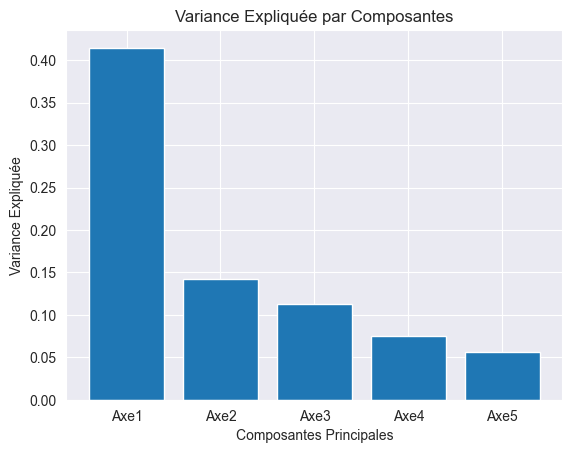

In [66]:
#PCA plus intelligente

# Sélection des colonnes pertinentes pour la PCA (toutes sauf les données géographiques et les noms des pays)
columns_for_pca = [
    'oosr_primary_age_male', 'oosr_primary_age_female',
    'completion_rate_primary_male', 'completion_rate_primary_female',
    'primary_end_proficiency_reading', 'primary_end_proficiency_math',
    'lower_secondary_end_proficiency_reading', 'lower_secondary_end_proficiency_math',
    'youth_15_24_literacy_rate_male', 'youth_15_24_literacy_rate_female',
    'birth_rate', 'gross_primary_education_enrollment',
    'gross_tertiary_education_enrollment', 'unemployment_rate',
    'oosr_secondary_age_male', 'oosr_secondary_age_female',
    'completion_rate_secondary_male', 'completion_rate_secondary_female'
]

# Filtration des données pour ne garder que les colonnes sélectionnées
df_selected = df[columns_for_pca]

# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_selected)

# Convertir le résultat imputé en DataFrame pour une utilisation ultérieure
df_imputed = pd.DataFrame(df_imputed, columns=columns_for_pca)

# Standardisation des données pour la PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Application de l'ACP
pca = PCA(n_components=5)
pcs = pca.fit_transform(df_scaled)

# Afficher les composantes
print(pca.components_)

# Visualiser la variance expliquée par chaque composante
plt.bar(["Axe1", "Axe2", "Axe3", "Axe4", "Axe5"], pca.explained_variance_ratio_)
plt.ylabel("Variance Expliquée")
plt.xlabel("Composantes Principales")
plt.title("Variance Expliquée par Composantes")
plt.show()

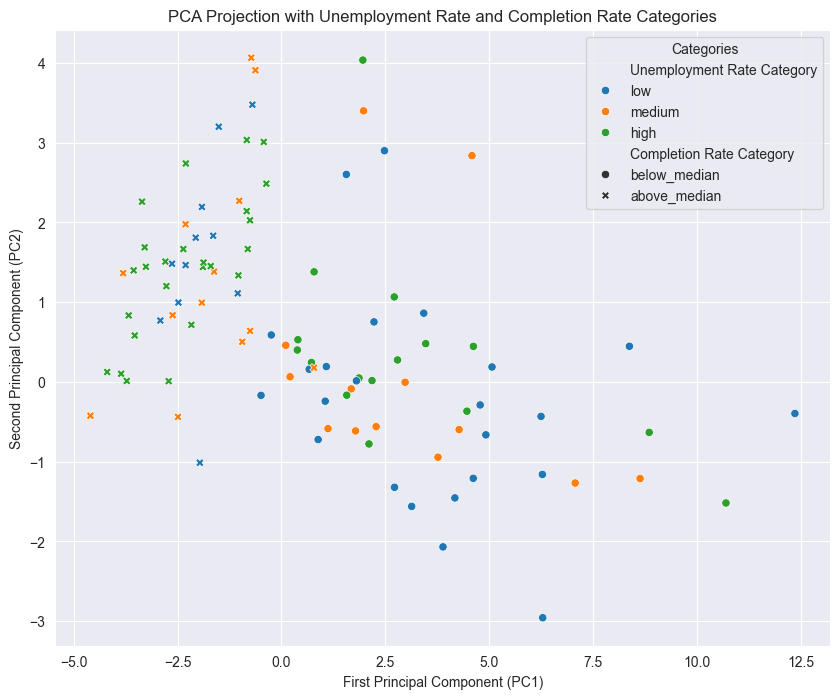

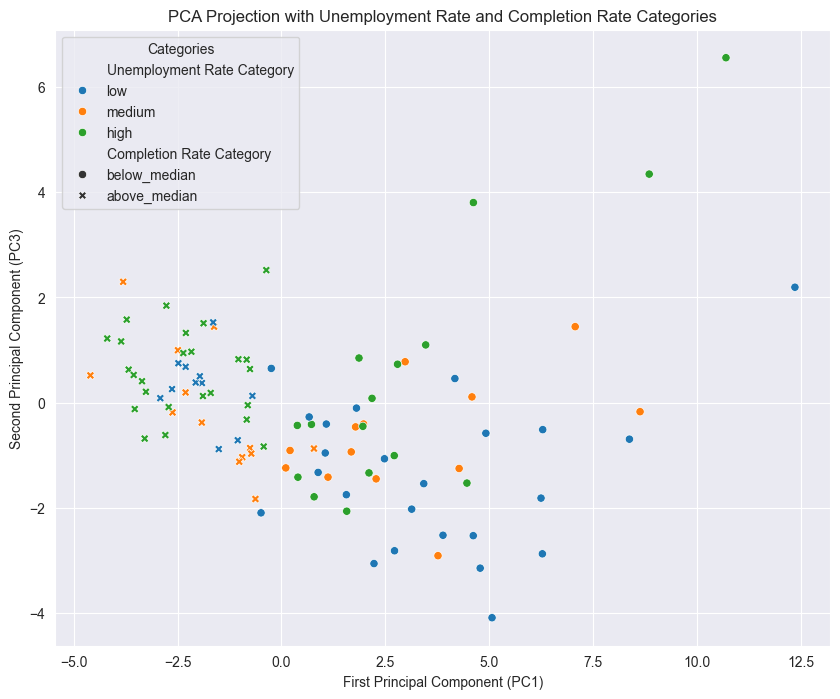

In [72]:
# Puisque nous avons déjà préparé df_scaled, nous procédons directement à la PCA
pca = PCA(n_components=3)  # Nous utilisons 3 composantes pour pouvoir visualiser (1,2) et (1,3)
pcs = pca.fit_transform(df_scaled)

# Création d'un DataFrame pour les composantes principales
pcs_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2', 'PC3'])
pcs_df['Unemployment Rate Category'] = df['unemployment_rate_cat']
pcs_df['Completion Rate Category'] = df['completion_rate_primary_male_cat']

# Visualisation
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Unemployment Rate Category', style='Completion Rate Category', data=pcs_df)
plt.title('PCA Projection with Unemployment Rate and Completion Rate Categories')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.legend(title='Categories')
plt.grid(True)
plt.show()

# Visualisation des données selon les axes (1, 3)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC3', hue='Unemployment Rate Category', style='Completion Rate Category', data=pcs_df)
plt.title('PCA Projection with Unemployment Rate and Completion Rate Categories')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC3)')
plt.legend(title='Categories')
plt.grid(True)
plt.show()

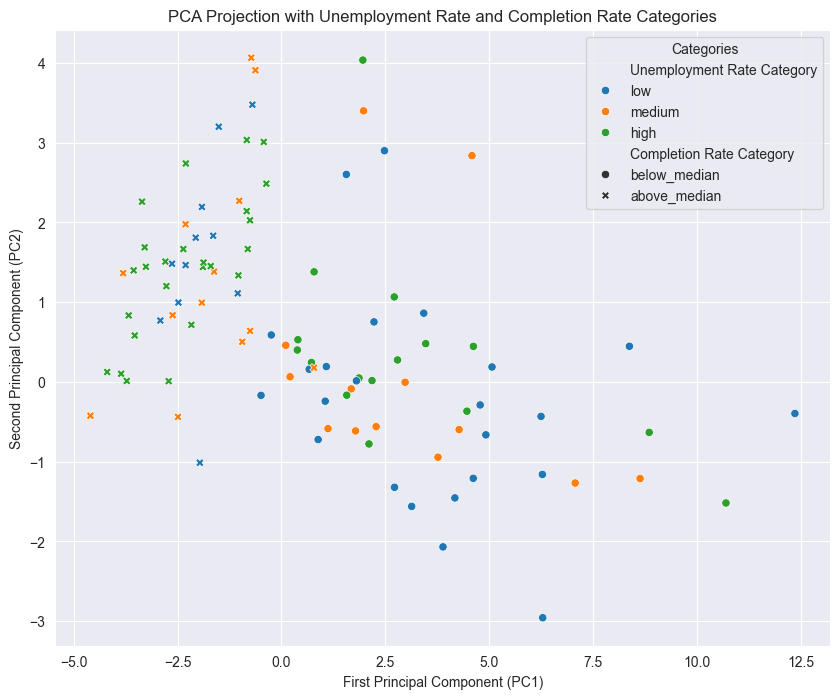

In [70]:
# Ajoutons des catégories hypothétiques pour l'exemple
# Catégorisation du taux de chômage pour 'hue'
df['unemployment_rate_cat'] = pd.qcut(df['unemployment_rate'], 3, labels=['low', 'medium', 'high'])

# Catégorisation du taux d'achèvement de l'éducation primaire pour les hommes pour 'style'
df['completion_rate_primary_male_cat'] = pd.qcut(df['completion_rate_primary_male'], 2, labels=['below_median', 'above_median'])

# Application de la PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(df_scaled)

# Création d'un DataFrame pour les composantes principales
pcs_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'])
pcs_df['Unemployment Rate Category'] = df['unemployment_rate_cat']
pcs_df['Completion Rate Category'] = df['completion_rate_primary_male_cat']

# Visualisation
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Unemployment Rate Category', style='Completion Rate Category', data=pcs_df)
plt.title('PCA Projection with Unemployment Rate and Completion Rate Categories')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.legend(title='Categories')
plt.grid(True)
plt.show()

# scenario 1 Taux de scolarisation et taux de chômage

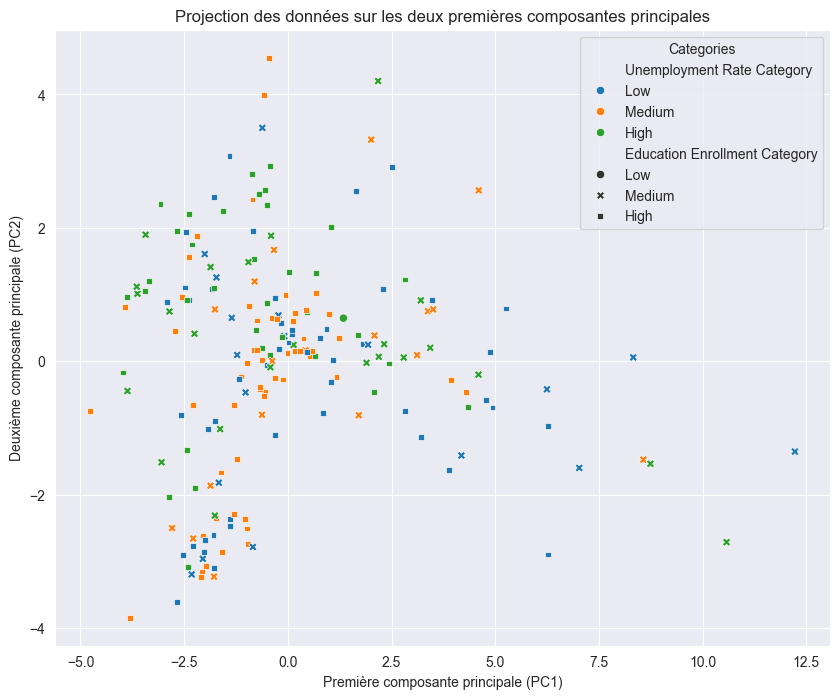

In [80]:

# Imputation des valeurs manquantes pour les données numériques
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Assurez-vous d'inclure uniquement les colonnes numériques
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Ajout des catégories après l'imputation pour éviter les erreurs dues aux NaN
df['unemployment_rate_cat'] = pd.qcut(df['unemployment_rate'], 3, labels=['Low', 'Medium', 'High'])
df['education_enrollment_cat'] = pd.cut(df['gross_primary_education_enrollment'], bins=[0, 50, 100, 150], labels=['Low', 'Medium', 'High'])

# Sélectionner les colonnes numériques pour la PCA
columns_for_pca = df.select_dtypes(include=[np.number]).columns  # Mettre à jour après imputation pour inclure seulement les colonnes numériques

# Standardisation des données numériques
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_pca])

# Application de la PCA
pca = PCA(n_components=2)  # Réduction à deux composantes principales pour la visualisation
pcs = pca.fit_transform(df_scaled)

# Création d'un DataFrame pour les résultats de la PCA
pcs_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])
pcs_df['Unemployment Rate Category'] = df['unemployment_rate_cat']
pcs_df['Education Enrollment Category'] = df['education_enrollment_cat']

# Visualisation des deux premières composantes principales avec catégories
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Unemployment Rate Category', style='Education Enrollment Category', data=pcs_df)
plt.title('Projection des données sur les deux premières composantes principales')
plt.xlabel('Première composante principale (PC1)')
plt.ylabel('Deuxième composante principale (PC2)')
plt.legend(title='Categories')
plt.grid(True)
plt.show()

# Scénario 2: Taux de littératie parmi les jeunes et taux de naissance

Unique bins created: IntervalIndex([(38.499, 90.532], (90.532, 100.0]], dtype='interval[float64, right]')


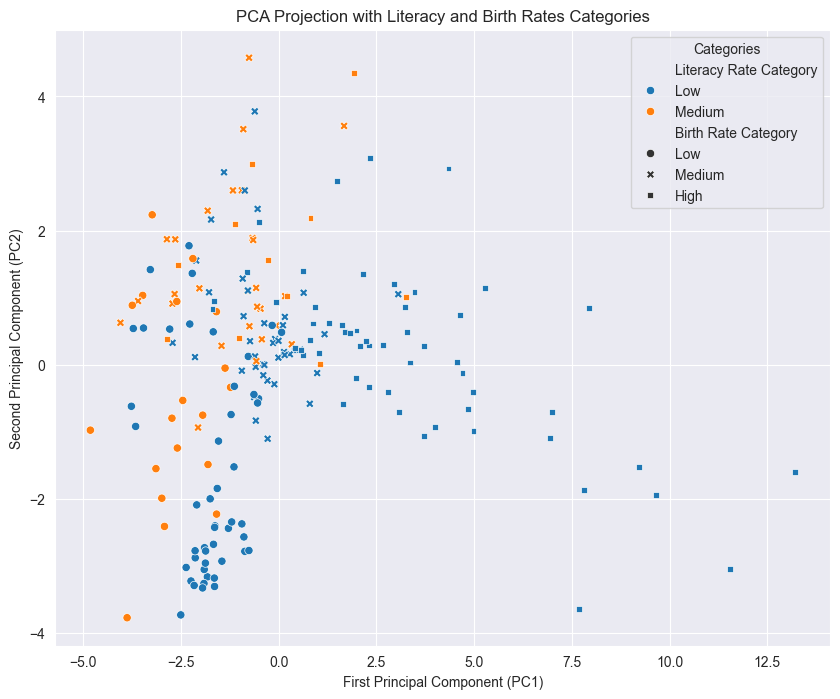

In [84]:

numeric_columns = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Calcul de la moyenne pour le taux de littératie
df['literacy_rate_avg'] = df[['youth_15_24_literacy_rate_male', 'youth_15_24_literacy_rate_female']].mean(axis=1)

# Tentative de création des bins avec pd.qcut
try:
    categories = pd.qcut(df['literacy_rate_avg'], 3, duplicates='drop')
    unique_bins = categories.cat.categories
    print("Unique bins created:", unique_bins)

    # Application de pd.qcut avec le nombre correct de labels basé sur les bins uniques
    df['literacy_rate_cat'] = pd.qcut(df['literacy_rate_avg'], 3, labels=['Low', 'Medium', 'High'][:len(unique_bins)], duplicates='drop')

except ValueError as e:
    print("Error:", e)

# Ajout de catégories pour le taux de naissance
df['birth_rate_cat'] = pd.qcut(df['birth_rate'], 3, labels=['Low', 'Medium', 'High'], duplicates='drop')

# Standardisation des données numériques
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])

# Application de la PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(df_scaled)

# Création d'un DataFrame pour les résultats de la PCA
pcs_df = pd.DataFrame(data=pcs, columns=['PC1', 'PC2'])
pcs_df['Literacy Rate Category'] = df['literacy_rate_cat']
pcs_df['Birth Rate Category'] = df['birth_rate_cat']

# Visualisation des deux premières composantes principales avec catégories
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Literacy Rate Category', style='Birth Rate Category', data=pcs_df)
plt.title('PCA Projection with Literacy and Birth Rates Categories')
plt.xlabel('First Principal Component (PC1)')
plt.ylabel('Second Principal Component (PC2)')
plt.legend(title='Categories')
plt.grid(True)
plt.show()